# Water Quality Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


**Data Preprocessing**

In [2]:
df= pd.read_csv("waterQuality1.csv")
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [3]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [4]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [5]:
non_numeric_columns = df.columns[df.apply(lambda col: pd.to_numeric(col, errors='coerce').isna().any())] # checking for any different values

# Print the columns
print("Columns containing non-numeric values:", non_numeric_columns.tolist())

Columns containing non-numeric values: ['ammonia', 'is_safe']


In [6]:
for column in df.columns:
    # Identify non-numeric values in the column
    non_numeric_values = df[column][pd.to_numeric(df[column], errors='coerce').isna()]

    # If there are any non-numeric values, print the column name and the unique non-numeric values
    if not non_numeric_values.empty:
        print(f"Non-numeric values in column '{column}': {non_numeric_values.unique()}")

Non-numeric values in column 'ammonia': ['#NUM!']
Non-numeric values in column 'is_safe': ['#NUM!']


In [7]:
# there appears to be a non integer value in the dataset so lets replace it with 0 in the meantime
df  = df.replace('#NUM!',0)

In [8]:
df['ammonia'] = df['ammonia'].astype(float)
df['is_safe'] = df['is_safe'].astype(int)

In [9]:
df.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

In [11]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

**To count the number of columns**

**To find the number of rows in the dataset**

In [11]:
num_rows = df.shape[0]
print(num_rows)

7999


<Axes: >

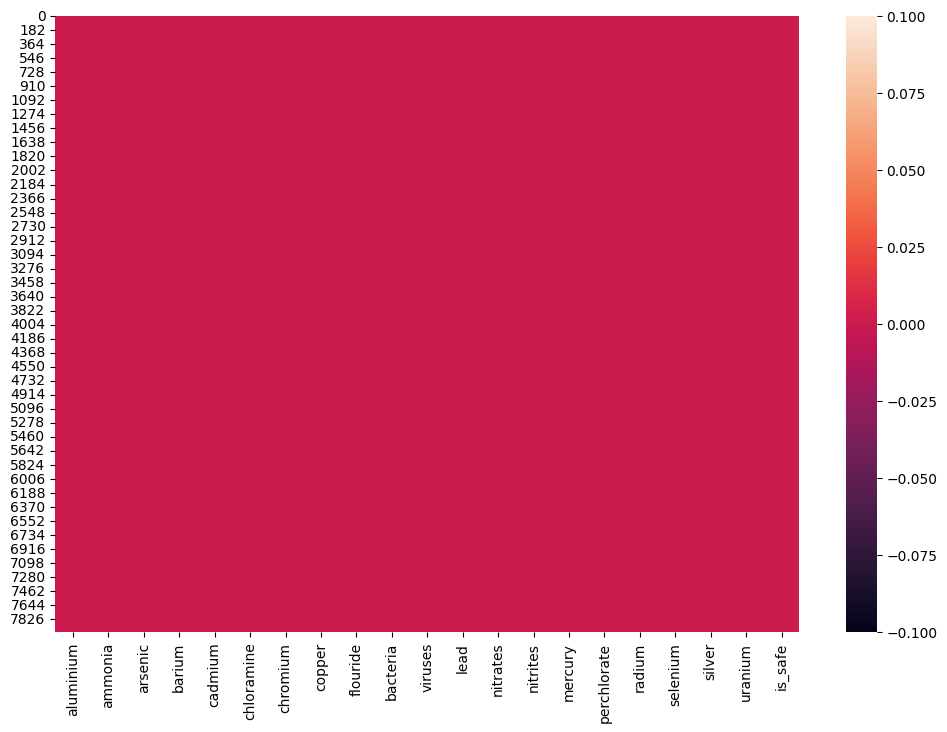

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

**Data Visualisation**

<Axes: xlabel='is_safe', ylabel='count'>

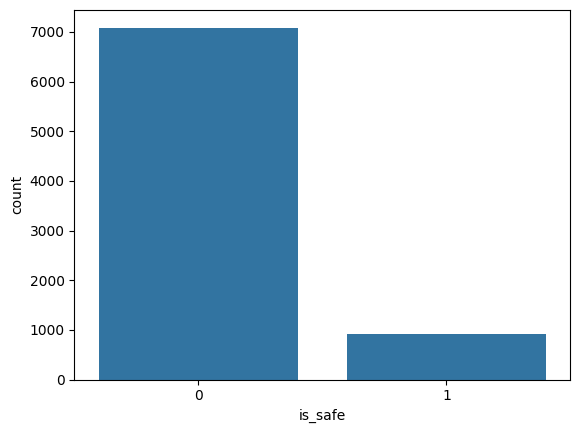

In [13]:
sns.countplot(x="is_safe",data=df)

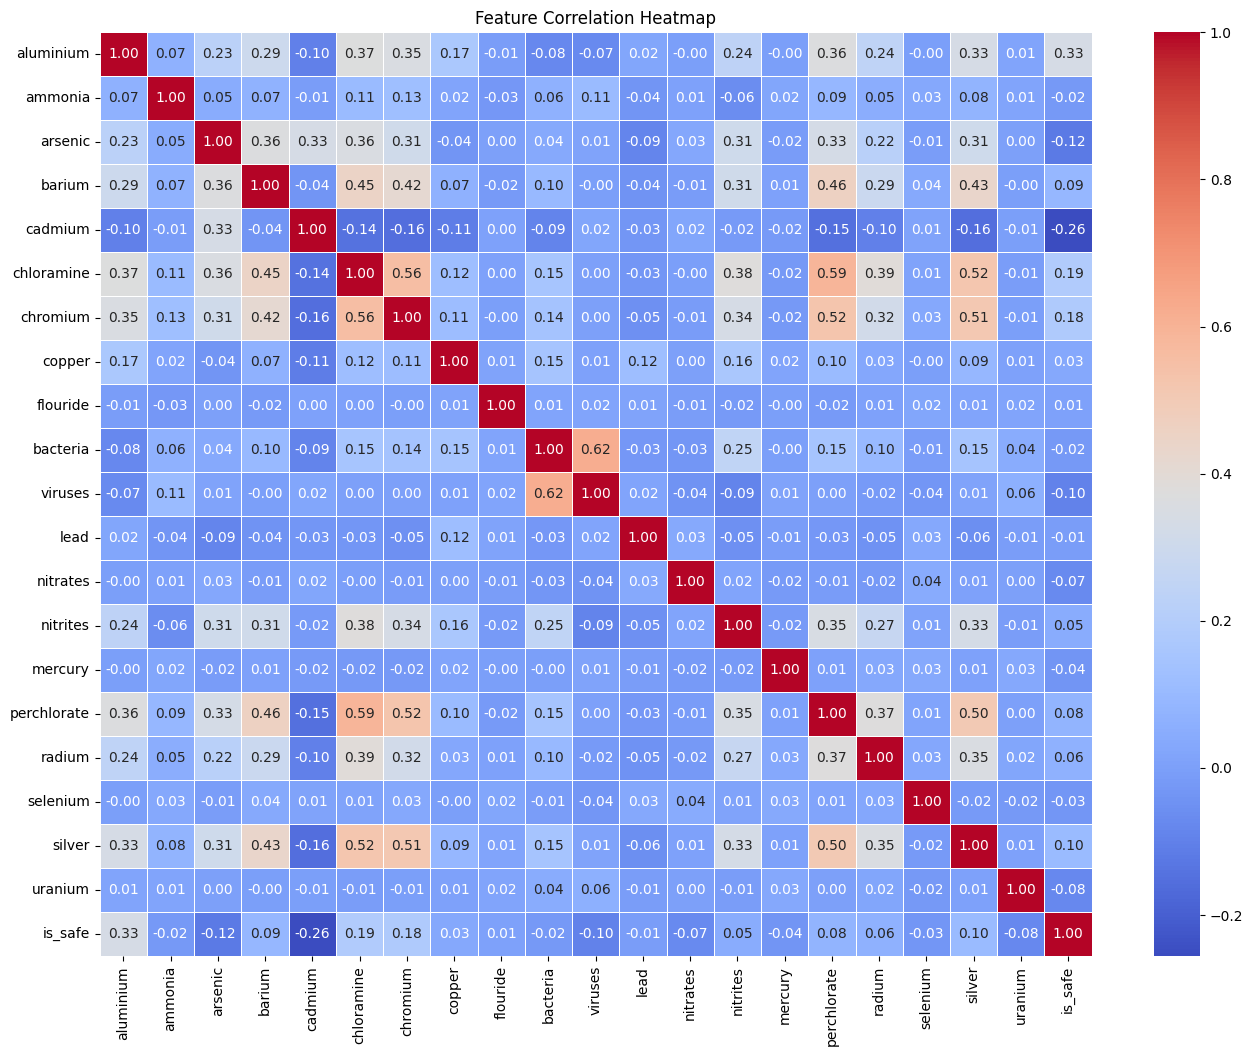

In [14]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:
df["is_safe"].value_counts()

is_safe
0    7087
1     912
Name: count, dtype: int64

In [16]:
fig = px.pie(df, names="is_safe", hole=0.4, template="plotly_dark")
fig.show()

**Data Preparing**

In [17]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [18]:
x=df.drop("is_safe",axis=1)
y=df["is_safe"]

In [19]:
from sklearn.model_selection import train_test_split # library module used to split input and output into trainning and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [20]:
x_train.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
3887,0.12,16.99,0.80,2.72,0.060,5.25,0.14,0.05,0.54,0.20,0.005,0.147,8.96,2.30,0.000,15.04,5.34,0.00,0.36,0.00
3566,0.06,22.39,0.55,0.55,0.090,3.43,0.68,0.05,0.71,0.85,0.850,0.001,0.46,1.61,0.005,40.80,1.02,0.05,0.27,0.01
5144,0.07,27.20,0.00,0.89,0.000,0.02,0.01,1.69,0.98,0.00,0.004,0.181,6.11,0.61,0.008,2.56,0.64,0.07,0.03,0.01
990,1.99,28.74,0.02,3.15,0.004,6.40,0.27,0.20,0.58,0.00,0.000,0.112,11.70,1.58,0.007,20.46,7.21,0.07,0.46,0.09
4641,0.03,13.93,0.09,0.15,0.030,0.07,0.08,0.10,0.77,0.00,0.520,0.185,17.51,0.74,0.009,0.69,0.27,0.10,0.05,0.06


In [21]:
x_train['trace'] = x_train['bacteria']+x_train['viruses'] #trace material = bacteria+viruses
x_test['trace'] = x_test['bacteria']+x_test['viruses']
x_train.drop(columns = {'bacteria','viruses'},axis=1,inplace=True)
x_test.drop(columns={'bacteria','viruses'},axis=1,inplace=True)

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6399 entries, 3887 to 5765
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    6399 non-null   float64
 1   ammonia      6399 non-null   float64
 2   arsenic      6399 non-null   float64
 3   barium       6399 non-null   float64
 4   cadmium      6399 non-null   float64
 5   chloramine   6399 non-null   float64
 6   chromium     6399 non-null   float64
 7   copper       6399 non-null   float64
 8   flouride     6399 non-null   float64
 9   lead         6399 non-null   float64
 10  nitrates     6399 non-null   float64
 11  nitrites     6399 non-null   float64
 12  mercury      6399 non-null   float64
 13  perchlorate  6399 non-null   float64
 14  radium       6399 non-null   float64
 15  selenium     6399 non-null   float64
 16  silver       6399 non-null   float64
 17  uranium      6399 non-null   float64
 18  trace        6399 non-null   float64
dtypes: float

In [25]:
#x.shape,y.shape

In [23]:
x_train.skew()

aluminium      1.979188
ammonia        0.027511
arsenic        2.008805
barium         0.665101
cadmium        0.478435
chloramine     0.877167
chromium       1.026190
copper         0.243608
flouride      -0.033590
lead          -0.062863
nitrates      -0.047707
nitrites      -0.495528
mercury       -0.093174
perchlorate    0.911605
radium         0.538986
selenium       0.008535
silver         1.042557
uranium       -0.029738
trace          0.647336
dtype: float64

In [24]:
# from the is_safe pairplot it appears that the classes are heavily imbalanced and we need to apply resampling technique
from imblearn.over_sampling import SMOTE # using SMOTE technique to resample the classes
smt = SMOTE(random_state=42,sampling_strategy = 1.0) # initialising SMOTE
x_trainre,y_train = smt.fit_resample(x_train,y_train) # resampling x_train and y_train

In [25]:
y_train.value_counts()

is_safe
0    5669
1    5669
Name: count, dtype: int64

**Data Preprocessing**

In [26]:
from sklearn.preprocessing import StandardScaler  #importing StabStandardScaler from preprocessing library
scale = StandardScaler() # Standard Scaler Class is Used as The Dataset contains outliers and is skewed

In [27]:
x_train = scale.fit_transform(x_trainre) #fit transform x train
x_test = scale.transform(x_test)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression(C=0.1,class_weight='balanced',n_jobs=-1) #implementing LR model with some regularization
lr.fit(x_train,y_train) # fitting the model

LogisticRegression(C=0.1, class_weight='balanced', n_jobs=-1)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, balanced_accuracy_score, roc_auc_score


trainning accuracy = 0.8037572764155936
testing accuracy = 0.796875
precision score = 0.3208020050125313
recall score = 0.7032967032967034
 f1-score = 0.4406196213425129
roc_auc = 0.7560912289403122


Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

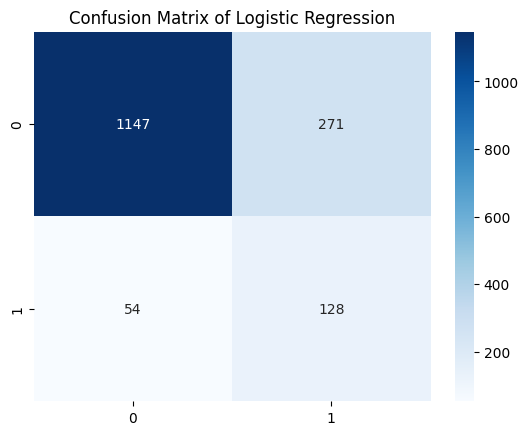

In [31]:
y_predlr = lr.predict(x_test)
y_trlr = lr.predict(x_train)
print(f'trainning accuracy = {accuracy_score(y_train,y_trlr)}')
print(f'testing accuracy = {accuracy_score(y_test,y_predlr)}')
print(f'precision score = {precision_score(y_test,y_predlr)}')
print(f'recall score = {recall_score(y_test,y_predlr)}')
print(f' f1-score = {f1_score(y_test,y_predlr)}')
print(f'roc_auc = {roc_auc_score(y_test,y_predlr)}')
sns.heatmap(confusion_matrix(y_test,y_predlr),annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix of Logistic Regression')

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
#creating a model object
#model_knn=KNeighborsClassifier

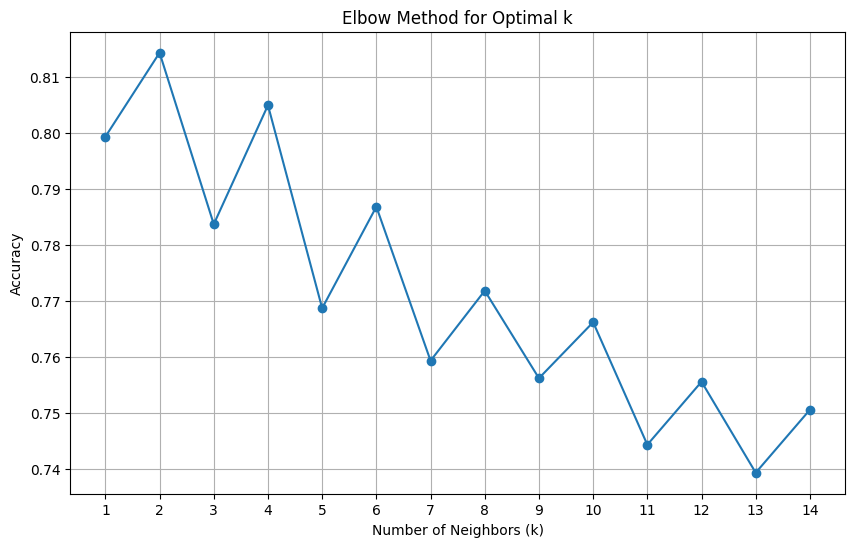

In [33]:
from sklearn.metrics import accuracy_score # importing it here for elbow method
accuracy_grid = []

# Loop over a range of k values
k_values = range(1, 15)
for k in k_values:
    # Create and fit the KNN model
    knnt = KNeighborsClassifier(n_neighbors=k)
    knnt.fit(x_train, y_train)

    # Predict on the test set
    y_predknn = knnt.predict(x_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_predknn)
    accuracy_grid.append(acc)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_grid, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [34]:
# from the above elbow graph the optimal odd k value appears to be 3 hence k=3
knn = KNeighborsClassifier(n_neighbors = 3,weights='distance',metric = 'manhattan') # initialising knn algorithm
knn.fit(x_train,y_train) # trainning knn algorithm

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

trainning accuracy = 1.0
testing accuracy = 0.75625
precision score = 0.18484848484848485
recall score = 0.33516483516483514
 f1-score = 0.23828125
roc_auc = 0.5727305134921495


Text(0.5, 1.0, 'Confusion Matrix of K-Nearest Neighbors')

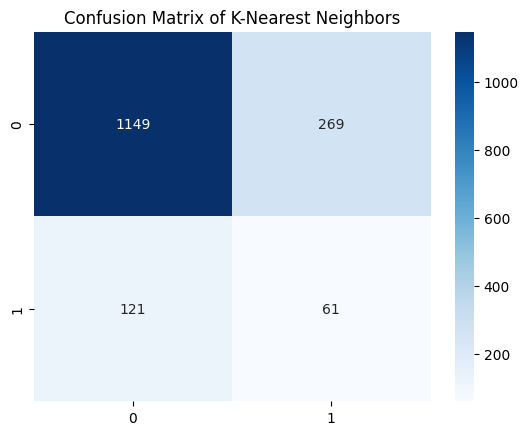

In [35]:
y_predknn = knn.predict(x_test)
y_knntr = knn.predict(x_train)
print(f'trainning accuracy = {accuracy_score(y_train,y_knntr)}')
print(f'testing accuracy = {accuracy_score(y_test,y_predknn)}')
print(f'precision score = {precision_score(y_test,y_predknn)}')
print(f'recall score = {recall_score(y_test,y_predknn)}')
print(f' f1-score = {f1_score(y_test,y_predknn)}')
print(f'roc_auc = {roc_auc_score(y_test,y_predknn)}')
sns.heatmap(confusion_matrix(y_test,y_predknn),annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix of K-Nearest Neighbors')

# Random Forest


In [36]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score


In [37]:
rf = RandomForestClassifier(ccp_alpha=0.0001,max_depth=15,max_features=7,min_samples_leaf=10,min_samples_split=20,n_estimators=50,class_weight='balanced',random_state=42) #initialize
rf.fit(x_train,y_train) # trainning the random forest model

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced', max_depth=15,
                       max_features=7, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=50, random_state=42)

trainning accuracy = 0.97733286293879
testing accuracy = 0.9525
precision score = 0.7523809523809524
recall score = 0.8681318681318682
 f1-score = 0.8061224489795918
roc_auc = 0.9157302500038749


Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

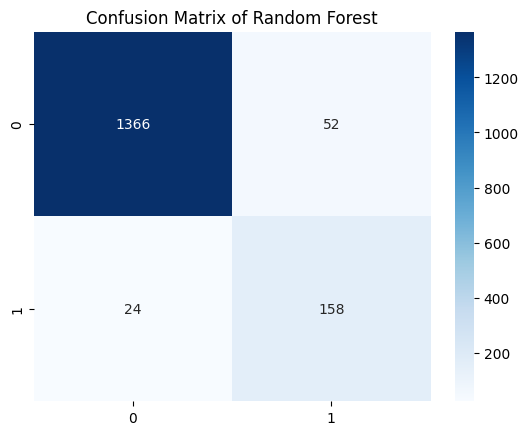

In [38]:
y_predrf = rf.predict(x_test)
y_trrf = rf.predict(x_train)
print(f'trainning accuracy = {accuracy_score(y_train,y_trrf)}')
print(f'testing accuracy = {accuracy_score(y_test,y_predrf)}')
print(f'precision score = {precision_score(y_test,y_predrf)}')
print(f'recall score = {recall_score(y_test,y_predrf)}')
print(f' f1-score = {f1_score(y_test,y_predrf)}')
print(f'roc_auc = {roc_auc_score(y_test,y_predrf)}')
sns.heatmap(confusion_matrix(y_test,y_predrf),annot=True,cmap = 'Blues',fmt='g')
plt.title('Confusion Matrix of Random Forest')

#  Gradient Boosting Techniques:


# XgBoost

In [39]:
from xgboost import XGBClassifier #importing XGBoost from xgboost library

In [40]:
xgb = XGBClassifier(learning_rate=0.02,max_depth=5,n_estimators = 100,sub_sample=0.7,colsample_bytree =0.8,reg_lambda=5,min_child_weight=3,booster='gbtree')
xgb.fit(x_train,y_train)

C:\Users\dmoha\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning:

[20:55:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sub_sample" } are not used.




XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

trainning accuracy = 0.9574880931381196
testing accuracy = 0.933125
precision score = 0.6394052044609665
recall score = 0.945054945054945
 f1-score = 0.7627494456762749
roc_auc = 0.9383243695655543


Text(0.5, 1.0, 'Confusion Matrix of XGBoost')

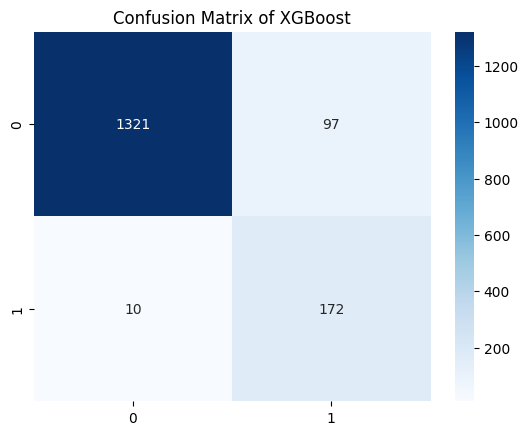

In [41]:
y_predxg = xgb.predict(x_test)
y_trxg = xgb.predict(x_train)
print(f'trainning accuracy = {accuracy_score(y_train,y_trxg)}')
print(f'testing accuracy = {accuracy_score(y_test,y_predxg)}')
print(f'precision score = {precision_score(y_test,y_predxg)}')
print(f'recall score = {recall_score(y_test,y_predxg)}')
print(f' f1-score = {f1_score(y_test,y_predxg)}')
print(f'roc_auc = {roc_auc_score(y_test,y_predxg)}')
sns.heatmap(confusion_matrix(y_test,y_predxg),annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix of XGBoost')

# Decision Tree



In [42]:
from sklearn.tree import DecisionTreeClassifier # importing decision tree from the sklearn.tree class

In [43]:
dt = DecisionTreeClassifier(ccp_alpha=0.0001,criterion='entropy',max_depth=8,min_samples_leaf=5,min_samples_split=5,max_features=8,class_weight='balanced',random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features=8,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

trainning accuracy = 0.9566061033692009
testing accuracy = 0.935625
precision score = 0.6586345381526104
recall score = 0.9010989010989011
 f1-score = 0.7610208816705336
roc_auc = 0.9205776592941614


Text(0.5, 1.0, 'Confusion Matrix of Decision Trees')

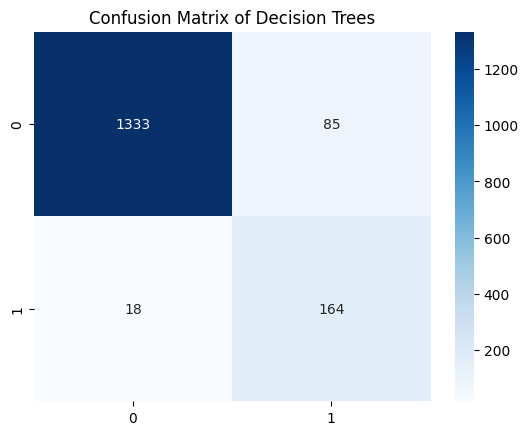

In [44]:
y_dtpred = dt.predict(x_test)
y_dttrain = dt.predict(x_train)
print(f'trainning accuracy = {accuracy_score(y_train,y_dttrain)}')
print(f'testing accuracy = {accuracy_score(y_test,y_dtpred)}')
print(f'precision score = {precision_score(y_test,y_dtpred)}')
print(f'recall score = {recall_score(y_test,y_dtpred)}')
print(f' f1-score = {f1_score(y_test,y_dtpred)}')
print(f'roc_auc = {roc_auc_score(y_test,y_dtpred)}')
sns.heatmap(confusion_matrix(y_test,y_dtpred),annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix of Decision Trees')

# SVM


In [45]:
print(x_train.shape, x_test.shape)


(11338, 19) (1600, 19)


In [46]:
from sklearn.svm import SVC


In [47]:
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(x_train, y_train)

SVC(class_weight='balanced', random_state=42)

training accuracy = 0.9716881284177104
testing accuracy = 0.919375
precision score = 0.6255924170616114
recall score = 0.7252747252747253
 f1-score = 0.6717557251908397
roc_auc = 0.8347812272353881


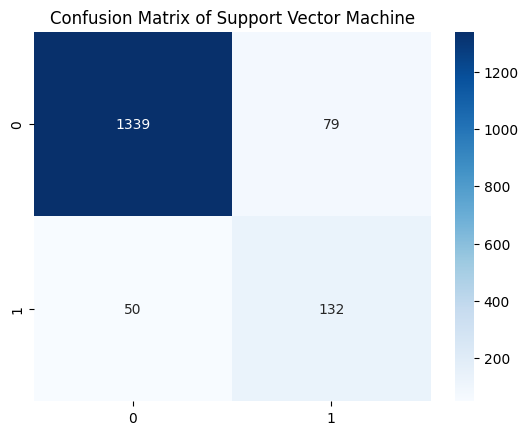

In [48]:
y_svmpred = svm.predict(x_test)
y_svmtrain = svm.predict(x_train) # Predictions on train data
print(f'training accuracy = {accuracy_score(y_train, y_svmtrain)}')
print(f'testing accuracy = {accuracy_score(y_test, y_svmpred)}')
print(f'precision score = {precision_score(y_test, y_svmpred)}')
print(f'recall score = {recall_score(y_test, y_svmpred)}')
print(f' f1-score = {f1_score(y_test, y_svmpred)}')
print(f'roc_auc = {roc_auc_score(y_test, y_svmpred)}')

sns.heatmap(confusion_matrix(y_test, y_svmpred), annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix of Support Vector Machine')
plt.show()


In [52]:
# import lightgbm as lgb
# lgb_train = lgb.Dataset(x_train, label=y_train)

# # Set parameters for the model
# params = {
#     'objective': 'binary',
#     'metric': 'binary_error',
#     'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
#     'learning_rate': 0.1,
#     'num_leaves': 31,
#     'verbose': -1  # Suppress LightGBM's output
# }

In [53]:
# lightg = lgb.train(params, lgb_train, num_boost_round=100)

In [49]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
results = {}
models = {
    'Decision Tree' : dt,
    'K-Nearest Neighbors':knn,
    'Random-Forest':rf,
    'XGBoost':xgb,
    'Logistic Regression':lr,
    'SVM':svm
}
for model_name,model in models.items():
    scores = cross_val_score(model,x_train,y_train,cv=skf,scoring='accuracy')
    results[model_name] = (np.mean(scores),np.std(scores))
for model_name,(mean_accuracy,std_dev) in results.items():
    print(f'{model_name} :  Mean Accuracy = {mean_accuracy:.4f}, Standard Deviation = {std_dev:.4f}')

C:\Users\dmoha\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning:

[20:56:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sub_sample" } are not used.


C:\Users\dmoha\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning:

[20:56:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sub_sample" } are not used.


C:\Users\dmoha\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning:

[20:56:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "sub_sample" } are not used.


C:\Users\dmoha\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning:

[20:56:46

Decision Tree :  Mean Accuracy = 0.9347, Standard Deviation = 0.0088
K-Nearest Neighbors :  Mean Accuracy = 0.8967, Standard Deviation = 0.0076
Random-Forest :  Mean Accuracy = 0.9612, Standard Deviation = 0.0063
XGBoost :  Mean Accuracy = 0.9488, Standard Deviation = 0.0066
Logistic Regression :  Mean Accuracy = 0.8033, Standard Deviation = 0.0156
SVM :  Mean Accuracy = 0.9560, Standard Deviation = 0.0058


In [55]:
# cvr = lgb.cv(params, lgb_train)


In [56]:
# results.values()

In [50]:
metrics = pd.DataFrame({})
metrics['Model'] = ['Decision Tree','K-Nearest Neighbors','Random Forest','XGBoost','Logistic Regression','svm']
metrics['Training Accuracy'] = [
    round(accuracy_score(y_train, y_dttrain), 3) * 100,
    round(accuracy_score(y_train, y_knntr), 3) * 100,
    round(accuracy_score(y_train, y_trrf), 3) * 100,
    round(accuracy_score(y_train, y_trxg), 3) * 100,
    round(accuracy_score(y_train, y_trlr), 3) * 100,
    round(accuracy_score(y_train, y_svmtrain), 3) * 100,  # Corrected SVM accuracy
]

metrics['Testing Accuracy'] = [
    round(accuracy_score(y_test, y_dtpred), 3)*100,
    round(accuracy_score(y_test, y_predknn), 3)*100,
    round(accuracy_score(y_test, y_predrf), 3)*100,
    round(accuracy_score(y_test, y_predxg), 3)*100,
    round(accuracy_score(y_test, y_predlr), 3)*100,
    round(accuracy_score(y_test, y_svmpred), 3)*100,
]

# Add precision, recall, f1 score, and roc_auc
metrics['Precision'] = [
    round(precision_score(y_test, y_dtpred), 3)*100,
    round(precision_score(y_test, y_predknn), 3)*100,
    round(precision_score(y_test, y_predrf), 3)*100,
    round(precision_score(y_test, y_predxg), 3)*100,
    round(precision_score(y_test, y_predlr), 3)*100,
    round(precision_score(y_test, y_svmpred), 3)*100,
]

metrics['Recall'] = [
    round(recall_score(y_test, y_dtpred), 3)*100,
    round(recall_score(y_test, y_predknn), 3)*100,
    round(recall_score(y_test, y_predrf), 3)*100,
    round(recall_score(y_test, y_predxg), 3)*100,
    round(recall_score(y_test, y_predlr), 3)*100,
    round(recall_score(y_test, y_svmpred), 3)*100,
]

metrics['F1 Score'] = [
    round(f1_score(y_test, y_dtpred), 3)*100,
    round(f1_score(y_test, y_predknn), 3)*100,
    round(f1_score(y_test, y_predrf), 3)*100,
    round(f1_score(y_test, y_predxg), 3)*100,
    round(f1_score(y_test, y_predlr), 3)*100,
    round(f1_score(y_test,y_svmpred), 3)*100,
]

# If you have binary classification, ensure you are using the correct label for roc_auc
metrics['ROC AUC'] = [
    round(roc_auc_score(y_test, y_dtpred), 3)*100,
    round(roc_auc_score(y_test, y_predknn), 3)*100,
    round(roc_auc_score(y_test, y_predrf), 3)*100,
    round(roc_auc_score(y_test, y_predxg), 3)*100,
    round(roc_auc_score(y_test, y_predlr), 3)*100,
    round(roc_auc_score(y_test, y_svmpred), 3)*100,
]
cross = [round(accuracy[0],3)*100 for accuracy in results.values()]
#cross.append( (1 - np.mean(cvr['valid binary_error-mean']))*100)
cross = cross[:6]  # Keep only the first 6 values
metrics['Cross Validation Scores(skf)(10-Fold)'] = cross

In [51]:
metrics.style.background_gradient(cmap='Greens')

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross Validation Scores(skf)(10-Fold)
0,Decision Tree,95.700000,93.600000,65.900000,90.100000,76.100000,92.100000,93.500000
1,K-Nearest Neighbors,100.000000,75.600000,18.500000,33.500000,23.800000,57.300000,89.700000
2,Random Forest,97.700000,95.300000,75.200000,86.800000,80.600000,91.600000,96.100000
3,XGBoost,95.700000,93.300000,63.900000,94.500000,76.300000,93.800000,94.900000
4,Logistic Regression,80.400000,79.700000,32.100000,70.300000,44.100000,75.600000,80.300000
5,svm,97.200000,91.900000,62.600000,72.500000,67.200000,83.500000,95.600000


In [52]:

# --- STEP 1: One new sample (scaled, 19 features) ---
new_sample_scaled = np.array([[
    0.432, -0.256, -0.123, 0.524, -0.412, 0.235, -0.121, 0.312, -0.432, 0.012,
    -0.321, 0.542, -0.654, -0.132, 0.123, -0.245, 0.234, 0.654, 0.111
]])
# --- STEP 2: Predict using all models ---
predictions = []
for model_name, model in models.items():
    pred = model.predict(new_sample_scaled)[0]
    predictions.append([model_name, 'Safe' if pred == 1 else 'Unsafe'])
# --- STEP 3: Create and print DataFrame ---
prediction_df = pd.DataFrame(predictions, columns=['Model', 'Prediction'])
print(prediction_df)


                 Model Prediction
0        Decision Tree       Safe
1  K-Nearest Neighbors       Safe
2        Random-Forest       Safe
3              XGBoost       Safe
4  Logistic Regression       Safe
5                  SVM       Safe
